<a href="https://colab.research.google.com/github/Yash-Patil09/Machine-Learning-Algo/blob/main/STARS_CLASSIFICATION_MODEL_PIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STARS CLASSIFICATION** **- MODEL PIPELINE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
data = pd.read_csv('/content/Stars.csv')

In [ ]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [ ]:
data.shape

(240, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [ ]:
data.isnull().sum()

,0
Temperature,0
L,0
R,0
A_M,0
Color,0
Spectral_Class,0
Type,0


In [ ]:
data[['Color','Spectral_Class']].value_counts().T

,,count
Color,Spectral_Class,
Red,M,110
Blue,O,40
Blue-white,B,18
Blue,B,16
Blue White,B,9
yellow-white,F,8
Blue-white,A,8
White,A,5
Yellowish White,F,3


In [ ]:
data.duplicated().T.isna().sum()

np.int64(0)

The Type is classification target, with categories like:

0: Red Dwarf

1: Brown Dwarf

2: White Dwarf

3: Main Sequence

4: Supergiant

5: Hypergiant

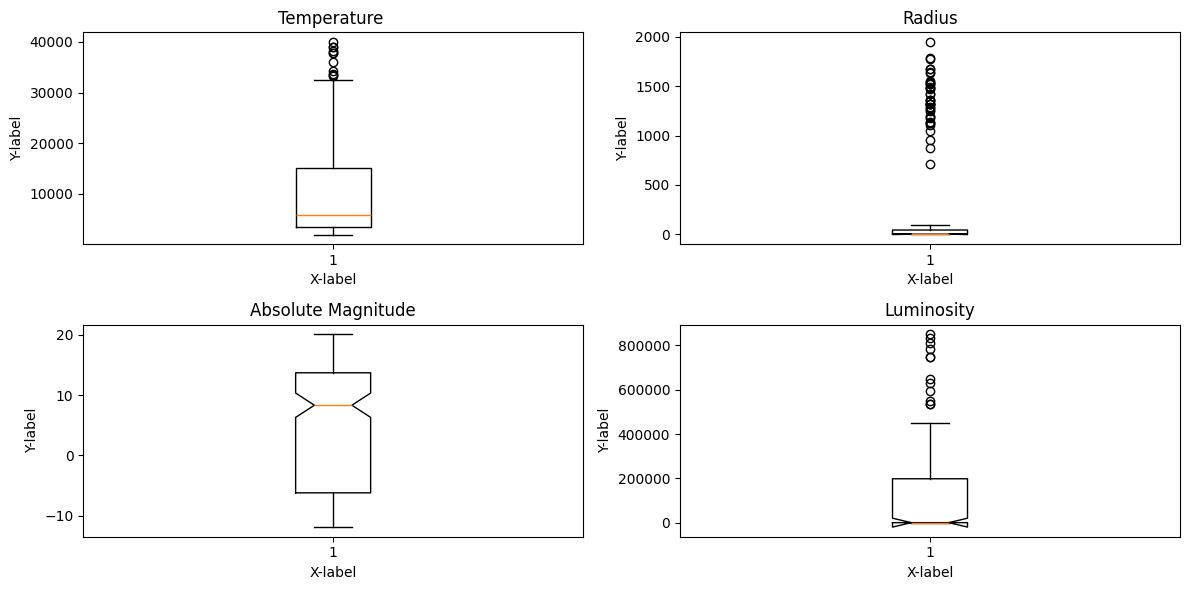

In [ ]:
fig , axes = plt.subplots(2,2,figsize=(12,6))
axes[0,0].boxplot(data['Temperature'])
axes[0,0].set_title('Temperature ')
axes[0,1].boxplot(data['R'],'tab:orange')
axes[0,1].set_title('Radius')
axes[1,0].boxplot(data['A_M'],'tab:blue')
axes[1,0].set_title('Absolute Magnitude')
axes[1,1].boxplot(data['L'],'tab:green')
axes[1,1].set_title('Luminosity')

for axe in axes.flat:
  axe.set(xlabel='X-label',ylabel='Y-label')
  plt.tight_layout()

plt.show()

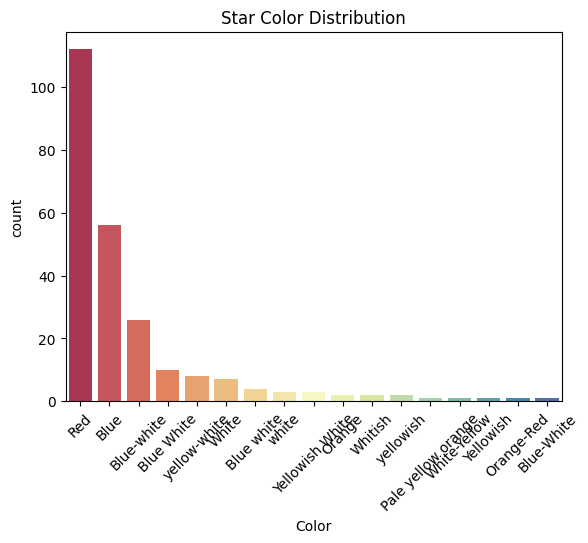

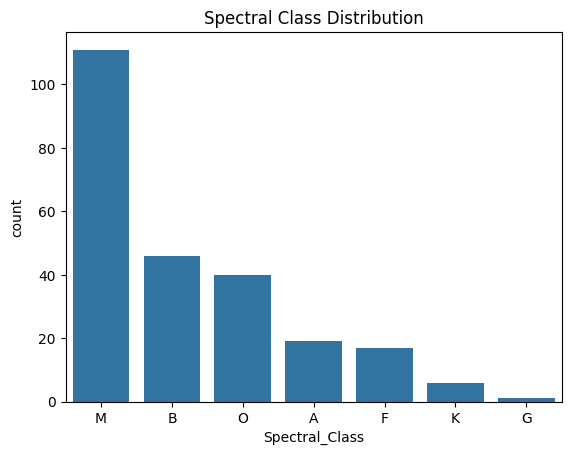

In [ ]:
sns.countplot(data=data, x='Color', order=data['Color'].value_counts().index,palette='Spectral'
)
plt.xticks(rotation=45)
plt.title("Star Color Distribution")
plt.show()

sns.countplot(data=data, x='Spectral_Class', order=data['Spectral_Class'].value_counts().index)
plt.title("Spectral Class Distribution")
plt.show()

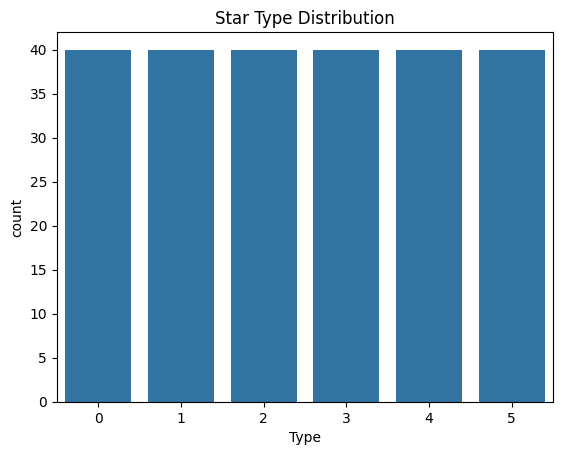

In [ ]:
sns.countplot(data=data, x='Type')
plt.title("Star Type Distribution")
plt.show()

In [ ]:
data['Type'].value_counts()

,count
Type,
0,40
1,40
2,40
3,40
4,40
5,40


In [ ]:
encoder = LabelEncoder()
data['Color'] = encoder.fit_transform(data['Color'])
data['Spectral_Class']= encoder.fit_transform(data['Spectral_Class'])

In [ ]:
x = data.drop('Type', axis=1)
y = data['Type']

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# STEP 1: SPLIT THE DATA
# ============================================================================
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split data into training and testing sets

    Parameters:
    X: Features (already preprocessed)
    y: Target variable
    test_size: Proportion of data for testing (default 20%)
    random_state: For reproducible results
    """
    print("📊 SPLITTING DATA")
    print("-" * 30)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"✅ Training set: {X_train.shape[0]} samples")
    print(f"✅ Testing set: {X_test.shape[0]} samples")
    print(f"📈 Split ratio: {int((1-test_size)*100)}% train, {int(test_size*100)}% test")

    return X_train, X_test, y_train, y_test

# ============================================================================
# STEP 2: DEFINE MODELS
# ============================================================================
def get_models():
    """
    Define all models we'll use with beginner-friendly parameters
    """
    models = {
        'Decision Tree': DecisionTreeClassifier(
            random_state=42,
            max_depth=10,  # Prevent overfitting
            min_samples_split=5,  # Minimum samples to split
            min_samples_leaf=2   # Minimum samples in leaf
        ),

        'Random Forest': RandomForestClassifier(
            n_estimators=100,  # Number of trees
            random_state=42,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2
        ),

        'Logistic Regression': LogisticRegression(
            random_state=42,
            max_iter=1000,  # Ensure convergence
            multi_class='ovr'  # One-vs-Rest for multi-class
        ),

        'K-Nearest Neighbors': KNeighborsClassifier(
            n_neighbors=5,  # Number of neighbors to consider
            weights='distance'  # Weight by distance
        ),

        'Support Vector Machine': SVC(
            random_state=42,
            kernel='rbf',  # Radial basis function kernel
            probability=True  # Enable probability estimates
        )
    }

    return models

# ============================================================================
# STEP 3: TRAIN AND EVALUATE MODELS
# ============================================================================
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """
    Train a model and evaluate its performance

    Returns: Dictionary with model performance metrics
    """
    print(f"\n🚀 TRAINING {model_name.upper()}")
    print("-" * 50)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Cross-validation score (more robust evaluation)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Print results
    print(f"📈 Training Accuracy: {train_accuracy:.4f}")
    print(f"📊 Testing Accuracy: {test_accuracy:.4f}")
    print(f"🔄 Cross-Validation: {cv_mean:.4f} (±{cv_std:.4f})")

    # Check for overfitting
    overfitting = train_accuracy - test_accuracy
    if overfitting > 0.1:
        print(f"⚠️  Possible overfitting detected! Difference: {overfitting:.4f}")
    else:
        print(f"✅ Good generalization! Difference: {overfitting:.4f}")

    return {
        'model': model,
        'model_name': model_name,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_test_pred,
        'overfitting': overfitting
    }

# ============================================================================
# STEP 4: VISUALIZE RESULTS
# ============================================================================
def plot_confusion_matrix(y_true, y_pred, model_name, class_names=None):
    """
    Plot confusion matrix for a model
    """
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def plot_model_comparison(results):
    """
    Compare all models performance
    """
    # Extract data for plotting
    model_names = [r['model_name'] for r in results]
    train_scores = [r['train_accuracy'] for r in results]
    test_scores = [r['test_accuracy'] for r in results]
    cv_scores = [r['cv_mean'] for r in results]

    # Create comparison plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: Train vs Test Accuracy
    x = np.arange(len(model_names))
    width = 0.35

    ax1.bar(x - width/2, train_scores, width, label='Training', alpha=0.8)
    ax1.bar(x + width/2, test_scores, width, label='Testing', alpha=0.8)

    ax1.set_xlabel('Models')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Training vs Testing Accuracy')
    ax1.set_xticks(x)
    ax1.set_xticklabels(model_names, rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Cross-Validation Scores
    ax2.bar(model_names, cv_scores, alpha=0.8, color='green')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('CV Accuracy')
    ax2.set_title('Cross-Validation Accuracy')
    ax2.set_xticklabels(model_names, rotation=45)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def print_detailed_report(y_test, y_pred, model_name, class_names=None):
    """
    Print detailed classification report
    """
    print(f"\n📋 DETAILED REPORT - {model_name.upper()}")
    print("-" * 50)
    print(classification_report(y_test, y_pred, target_names=class_names))

# ============================================================================
# STEP 5: FEATURE IMPORTANCE (for tree-based models)
# ============================================================================
def plot_feature_importance(model, model_name, feature_names):
    """
    Plot feature importance for tree-based models
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance - {model_name}')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"\n🔍 TOP FEATURES - {model_name.upper()}")
        print("-" * 30)
        for i in range(min(5, len(importances))):
            print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# ============================================================================
# STEP 6: MAIN PIPELINE FUNCTION
# ============================================================================
def run_stars_classification_pipeline(X, y, feature_names=None, class_names=None):
    """
    Complete pipeline for stars classification

    Parameters:
    X: Preprocessed features
    y: Target variable
    feature_names: List of feature names
    class_names: List of class names
    """
    print("🌟 STARS CLASSIFICATION PIPELINE")
    print("=" * 60)

    # Step 1: Split data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Step 2: Get models
    models = get_models()

    # Step 3: Train and evaluate all models
    results = []

    for model_name, model in models.items():
        result = train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test)
        results.append(result)

        # Print detailed report
        print_detailed_report(y_test, result['predictions'], model_name, class_names)

        # Plot confusion matrix
        plot_confusion_matrix(y_test, result['predictions'], model_name, class_names)

        # Plot feature importance (if available)
        if feature_names:
            plot_feature_importance(result['model'], model_name, feature_names)

    # Step 4: Compare all models
    print("\n🏆 MODEL COMPARISON SUMMARY")
    print("=" * 60)
    print(f"{'Model':<20} {'Train Acc':<12} {'Test Acc':<12} {'CV Score':<12} {'Overfitting':<12}")
    print("-" * 70)

    for result in results:
        print(f"{result['model_name']:<20} {result['train_accuracy']:<12.4f} "
              f"{result['test_accuracy']:<12.4f} {result['cv_mean']:<12.4f} "
              f"{result['overfitting']:<12.4f}")

    # Plot comparison
    plot_model_comparison(results)

    # Find best model
    best_model_result = max(results, key=lambda x: x['cv_mean'])
    print(f"\n🥇 BEST MODEL: {best_model_result['model_name']}")
    print(f"   Cross-Validation Score: {best_model_result['cv_mean']:.4f}")
    print(f"   Test Accuracy: {best_model_result['test_accuracy']:.4f}")

    return results, best_model_result

🌟 STARS CLASSIFICATION PIPELINE
📊 SPLITTING DATA
------------------------------
✅ Training set: 192 samples
✅ Testing set: 48 samples
📈 Split ratio: 80% train, 20% test

🚀 TRAINING DECISION TREE
--------------------------------------------------
📈 Training Accuracy: 1.0000
📊 Testing Accuracy: 1.0000
🔄 Cross-Validation: 0.9843 (±0.0128)
✅ Good generalization! Difference: 0.0000

📋 DETAILED REPORT - DECISION TREE
--------------------------------------------------
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00         8

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg       1.00      1.00   

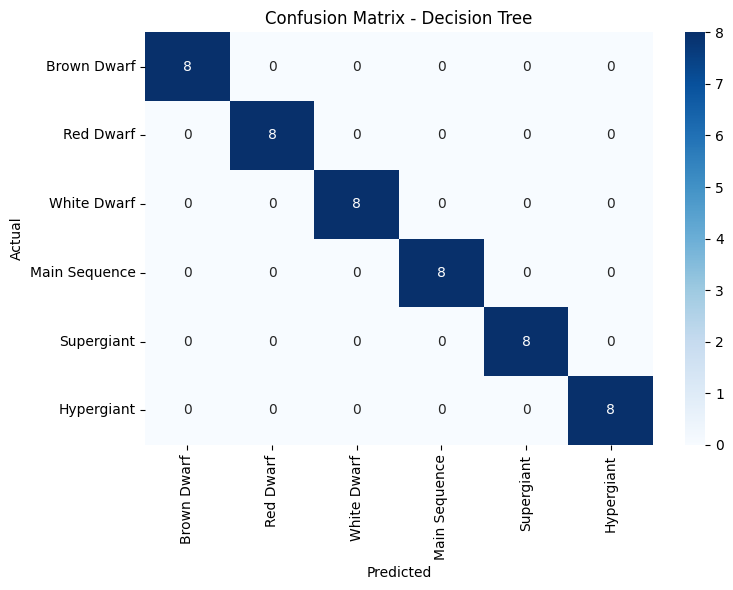

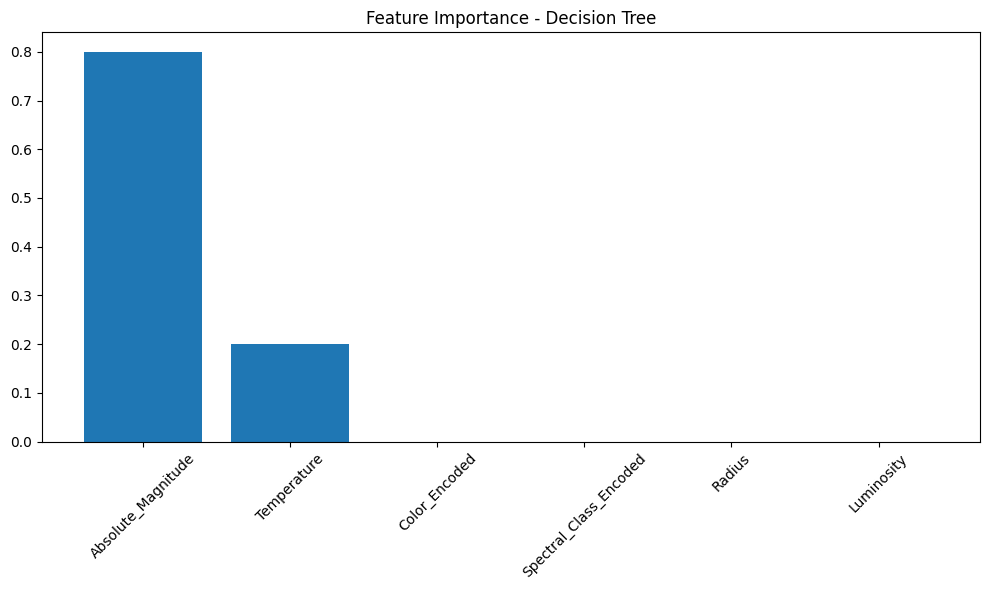


🔍 TOP FEATURES - DECISION TREE
------------------------------
1. Absolute_Magnitude: 0.8000
2. Temperature: 0.2000
3. Color_Encoded: 0.0000
4. Spectral_Class_Encoded: 0.0000
5. Radius: 0.0000

🚀 TRAINING RANDOM FOREST
--------------------------------------------------
📈 Training Accuracy: 1.0000
📊 Testing Accuracy: 1.0000
🔄 Cross-Validation: 1.0000 (±0.0000)
✅ Good generalization! Difference: 0.0000

📋 DETAILED REPORT - RANDOM FOREST
--------------------------------------------------
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       1.00      1.00      1.00         8
   Hypergiant       1.00      1.00      1.00         8

     accuracy                           1.00        48
    macro avg       1.00      1.00      1.00        48
 weighted avg

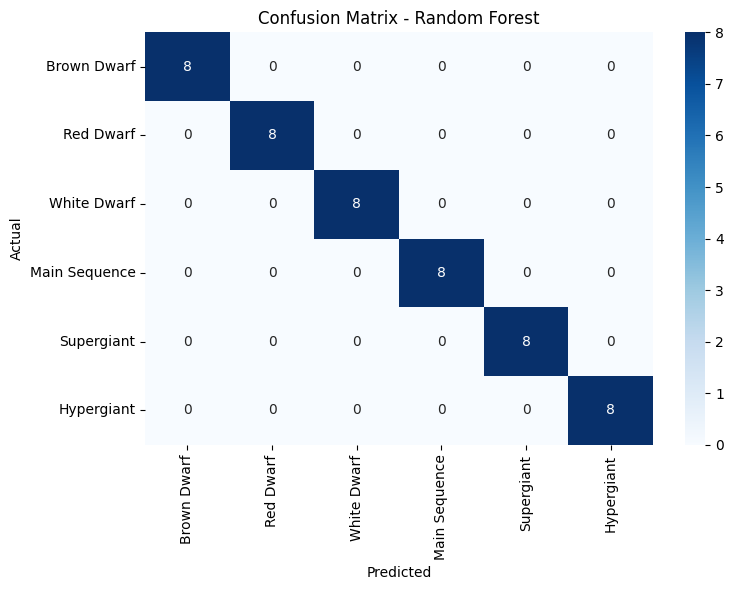

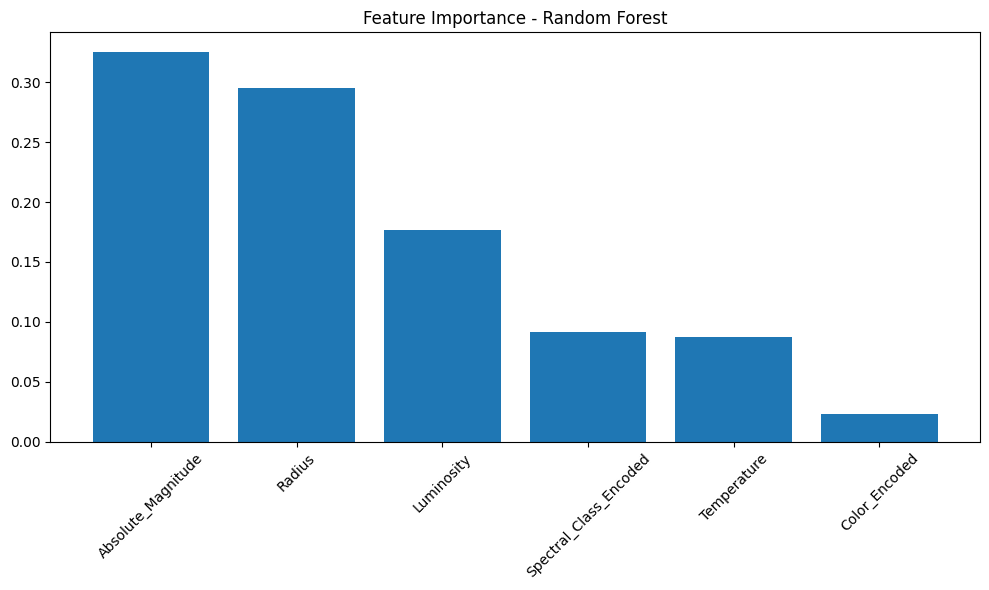


🔍 TOP FEATURES - RANDOM FOREST
------------------------------
1. Absolute_Magnitude: 0.3255
2. Radius: 0.2953
3. Luminosity: 0.1771
4. Spectral_Class_Encoded: 0.0914
5. Temperature: 0.0872

🚀 TRAINING LOGISTIC REGRESSION
--------------------------------------------------
📈 Training Accuracy: 0.9948
📊 Testing Accuracy: 0.9792
🔄 Cross-Validation: 0.9896 (±0.0127)
✅ Good generalization! Difference: 0.0156

📋 DETAILED REPORT - LOGISTIC REGRESSION
--------------------------------------------------
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00         8
    Red Dwarf       1.00      1.00      1.00         8
  White Dwarf       1.00      1.00      1.00         8
Main Sequence       1.00      1.00      1.00         8
   Supergiant       0.89      1.00      0.94         8
   Hypergiant       1.00      0.88      0.93         8

     accuracy                           0.98        48
    macro avg       0.98      0.98      0.98        48
 wei

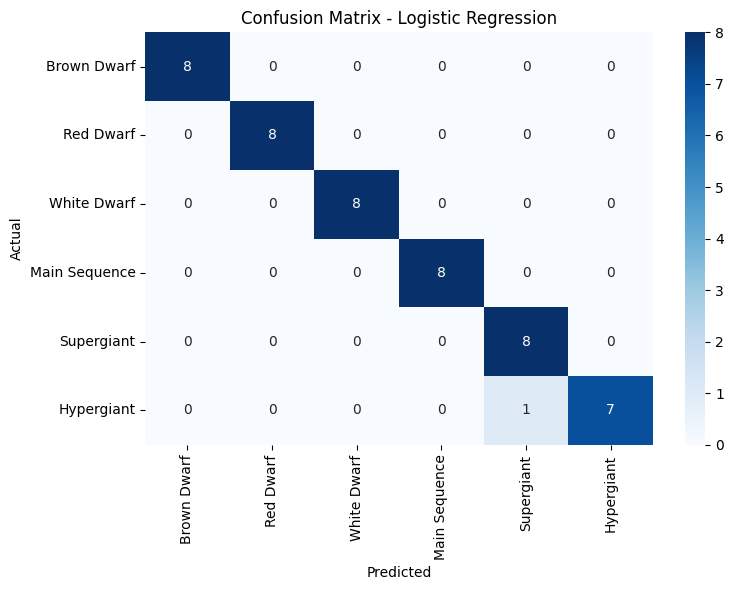


🚀 TRAINING K-NEAREST NEIGHBORS
--------------------------------------------------
📈 Training Accuracy: 1.0000
📊 Testing Accuracy: 0.7292
🔄 Cross-Validation: 0.6198 (±0.0254)
⚠️  Possible overfitting detected! Difference: 0.2708

📋 DETAILED REPORT - K-NEAREST NEIGHBORS
--------------------------------------------------
               precision    recall  f1-score   support

  Brown Dwarf       0.86      0.75      0.80         8
    Red Dwarf       0.78      0.88      0.82         8
  White Dwarf       0.70      0.88      0.78         8
Main Sequence       0.71      0.62      0.67         8
   Supergiant       0.62      0.62      0.62         8
   Hypergiant       0.71      0.62      0.67         8

     accuracy                           0.73        48
    macro avg       0.73      0.73      0.73        48
 weighted avg       0.73      0.73      0.73        48



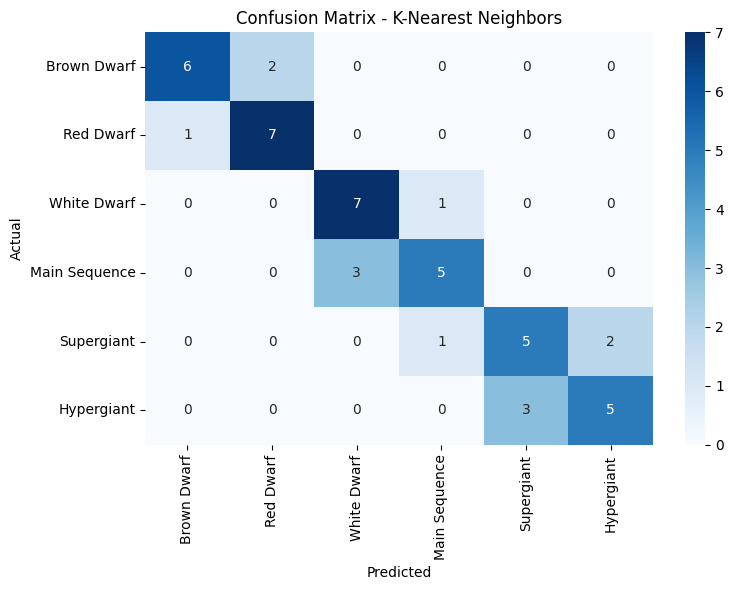


🚀 TRAINING SUPPORT VECTOR MACHINE
--------------------------------------------------
📈 Training Accuracy: 0.4427
📊 Testing Accuracy: 0.4792
🔄 Cross-Validation: 0.3232 (±0.0554)
✅ Good generalization! Difference: -0.0365

📋 DETAILED REPORT - SUPPORT VECTOR MACHINE
--------------------------------------------------
               precision    recall  f1-score   support

  Brown Dwarf       1.00      0.38      0.55         8
    Red Dwarf       0.40      1.00      0.57         8
  White Dwarf       0.57      0.50      0.53         8
Main Sequence       0.00      0.00      0.00         8
   Supergiant       0.43      0.75      0.55         8
   Hypergiant       0.50      0.25      0.33         8

     accuracy                           0.48        48
    macro avg       0.48      0.48      0.42        48
 weighted avg       0.48      0.48      0.42        48



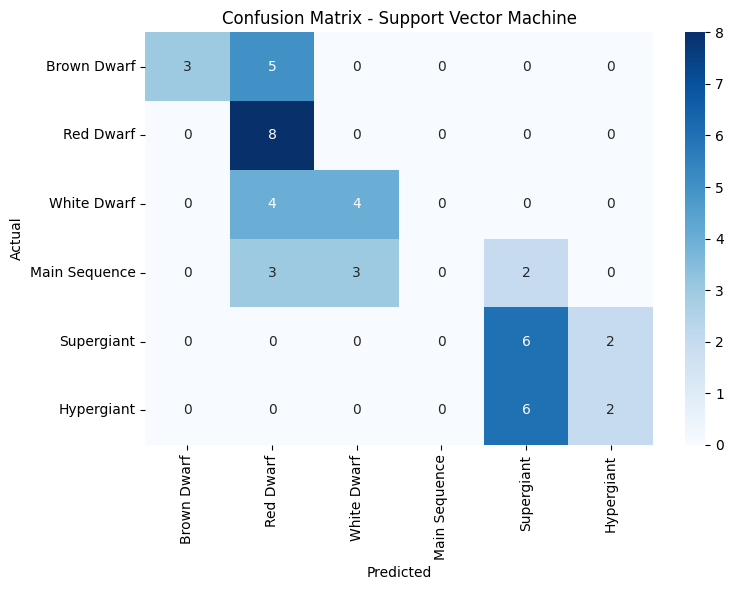


🏆 MODEL COMPARISON SUMMARY
Model                Train Acc    Test Acc     CV Score     Overfitting 
----------------------------------------------------------------------
Decision Tree        1.0000       1.0000       0.9843       0.0000      
Random Forest        1.0000       1.0000       1.0000       0.0000      
Logistic Regression  0.9948       0.9792       0.9896       0.0156      
K-Nearest Neighbors  1.0000       0.7292       0.6198       0.2708      
Support Vector Machine 0.4427       0.4792       0.3232       -0.0365     


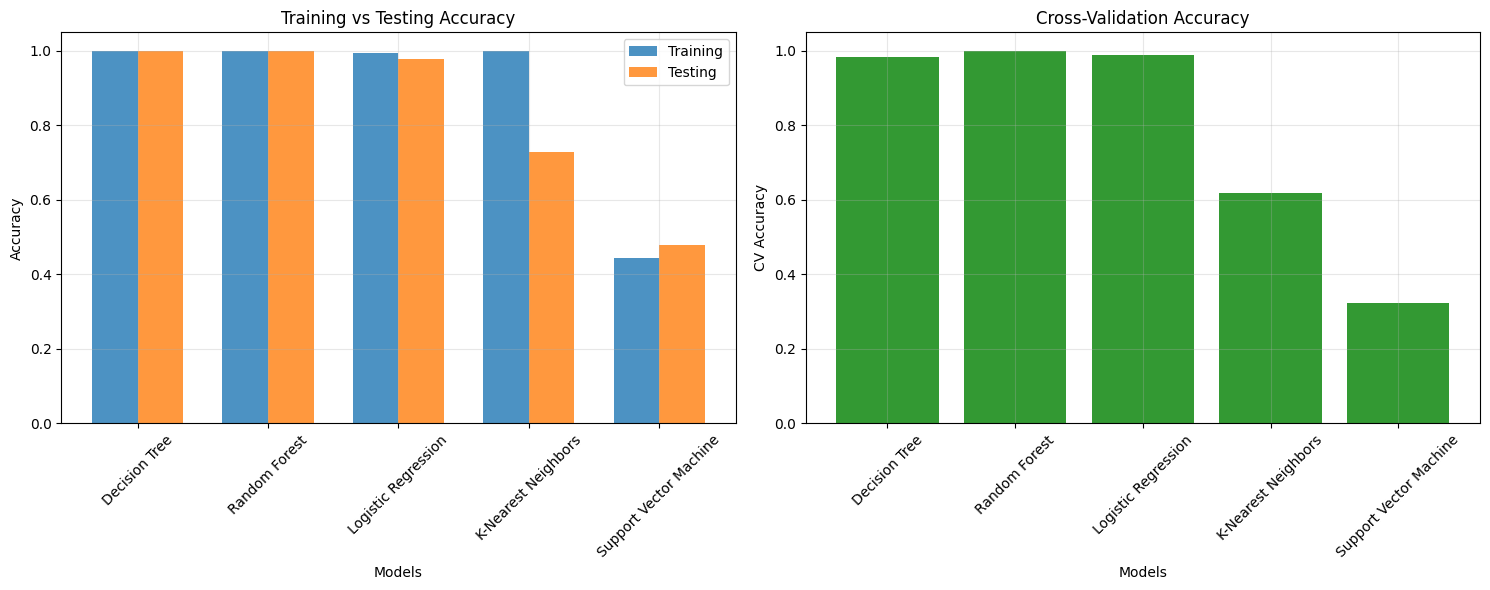


🥇 BEST MODEL: Random Forest
   Cross-Validation Score: 1.0000
   Test Accuracy: 1.0000


In [ ]:
# After your preprocessing is done:
feature_names = ['Temperature', 'Luminosity', 'Radius', 'Absolute_Magnitude',
                'Color_Encoded', 'Spectral_Class_Encoded']
class_names = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence',
               'Supergiant', 'Hypergiant']

# Run the complete pipeline
results, best_model = run_stars_classification_pipeline(
    X, y, feature_names=feature_names, class_names=class_names
)